In [179]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [181]:
data=pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [182]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


In [183]:
df=data.copy()

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [185]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [186]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [187]:
duplicates=df.duplicated() 

In [188]:
duplicates.sum()

0

In [189]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() 
     

age                          0
anaemia                      0
creatinine_phosphokinase    29
diabetes                     0
ejection_fraction            2
high_blood_pressure          0
platelets                   21
serum_creatinine            29
serum_sodium                 4
sex                          0
smoking                      0
time                         0
DEATH_EVENT                  0
dtype: int64

In [190]:
df1=df.copy()

In [191]:
def outliers(data,cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        Up=Q3 + (1.5 * IQR)
        Low=Q1 - (1.5 * IQR)
        data[col]=np.where(data[col]> Up,Up,np.where(data[col]<Low,Low,data[col]))

In [192]:
cols=['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

In [193]:
outliers(df1,cols)

In [194]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum() 
     

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [195]:
df1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,424.21,0.42,38.03,0.35,259163.71,1.23,136.71,0.65,0.32,130.26,0.32
std,11.89,0.50,385.45,0.49,11.69,0.48,81478.30,0.44,4.08,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,76000.00,0.50,125.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,1280.25,1.00,67.50,1.00,440000.00,2.15,148.00,1.00,1.00,285.00,1.00


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

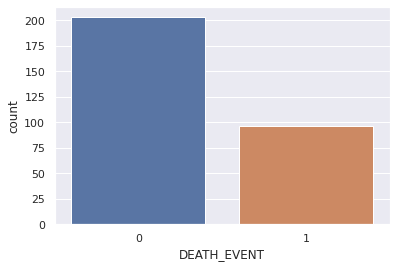

In [196]:
sns.countplot(df1['DEATH_EVENT']) 

In [197]:
df1.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [198]:
df2=df1.copy()

In [199]:
df2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582.00,0,20.00,1,265000.00,1.90,130.00,1,0,4,1
1,55.00,0,1280.25,0,38.00,0,263358.03,1.10,136.00,1,0,6,1
2,65.00,0,146.00,0,20.00,0,162000.00,1.30,129.00,1,1,7,1
3,50.00,1,111.00,0,20.00,0,210000.00,1.90,137.00,1,0,7,1
4,65.00,1,160.00,1,20.00,0,327000.00,2.15,125.00,0,0,8,1


In [200]:
df2.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [201]:
from sklearn.preprocessing import StandardScaler

In [202]:
df3=df2.copy()

In [203]:
num_cols=['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

In [204]:
for i in num_cols:
  scale = StandardScaler().fit(df3[[i]])
  df3[i] = scale.transform(df3[[i]])

In [205]:
df3.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,0.41,0,-1.55,1,0.07,1.51,-1.65,1,0,-1.63,1
1,55.00,0,2.22,0,-0.00,0,0.05,-0.31,-0.18,1,0,-1.60,1
2,65.00,0,-0.72,0,-1.55,0,-1.19,0.15,-1.89,1,1,-1.59,1
3,50.00,1,-0.81,0,-1.55,0,-0.60,1.51,0.07,1,0,-1.59,1
4,65.00,1,-0.69,1,-1.55,0,0.83,2.08,-2.88,0,0,-1.58,1


<AxesSubplot:>

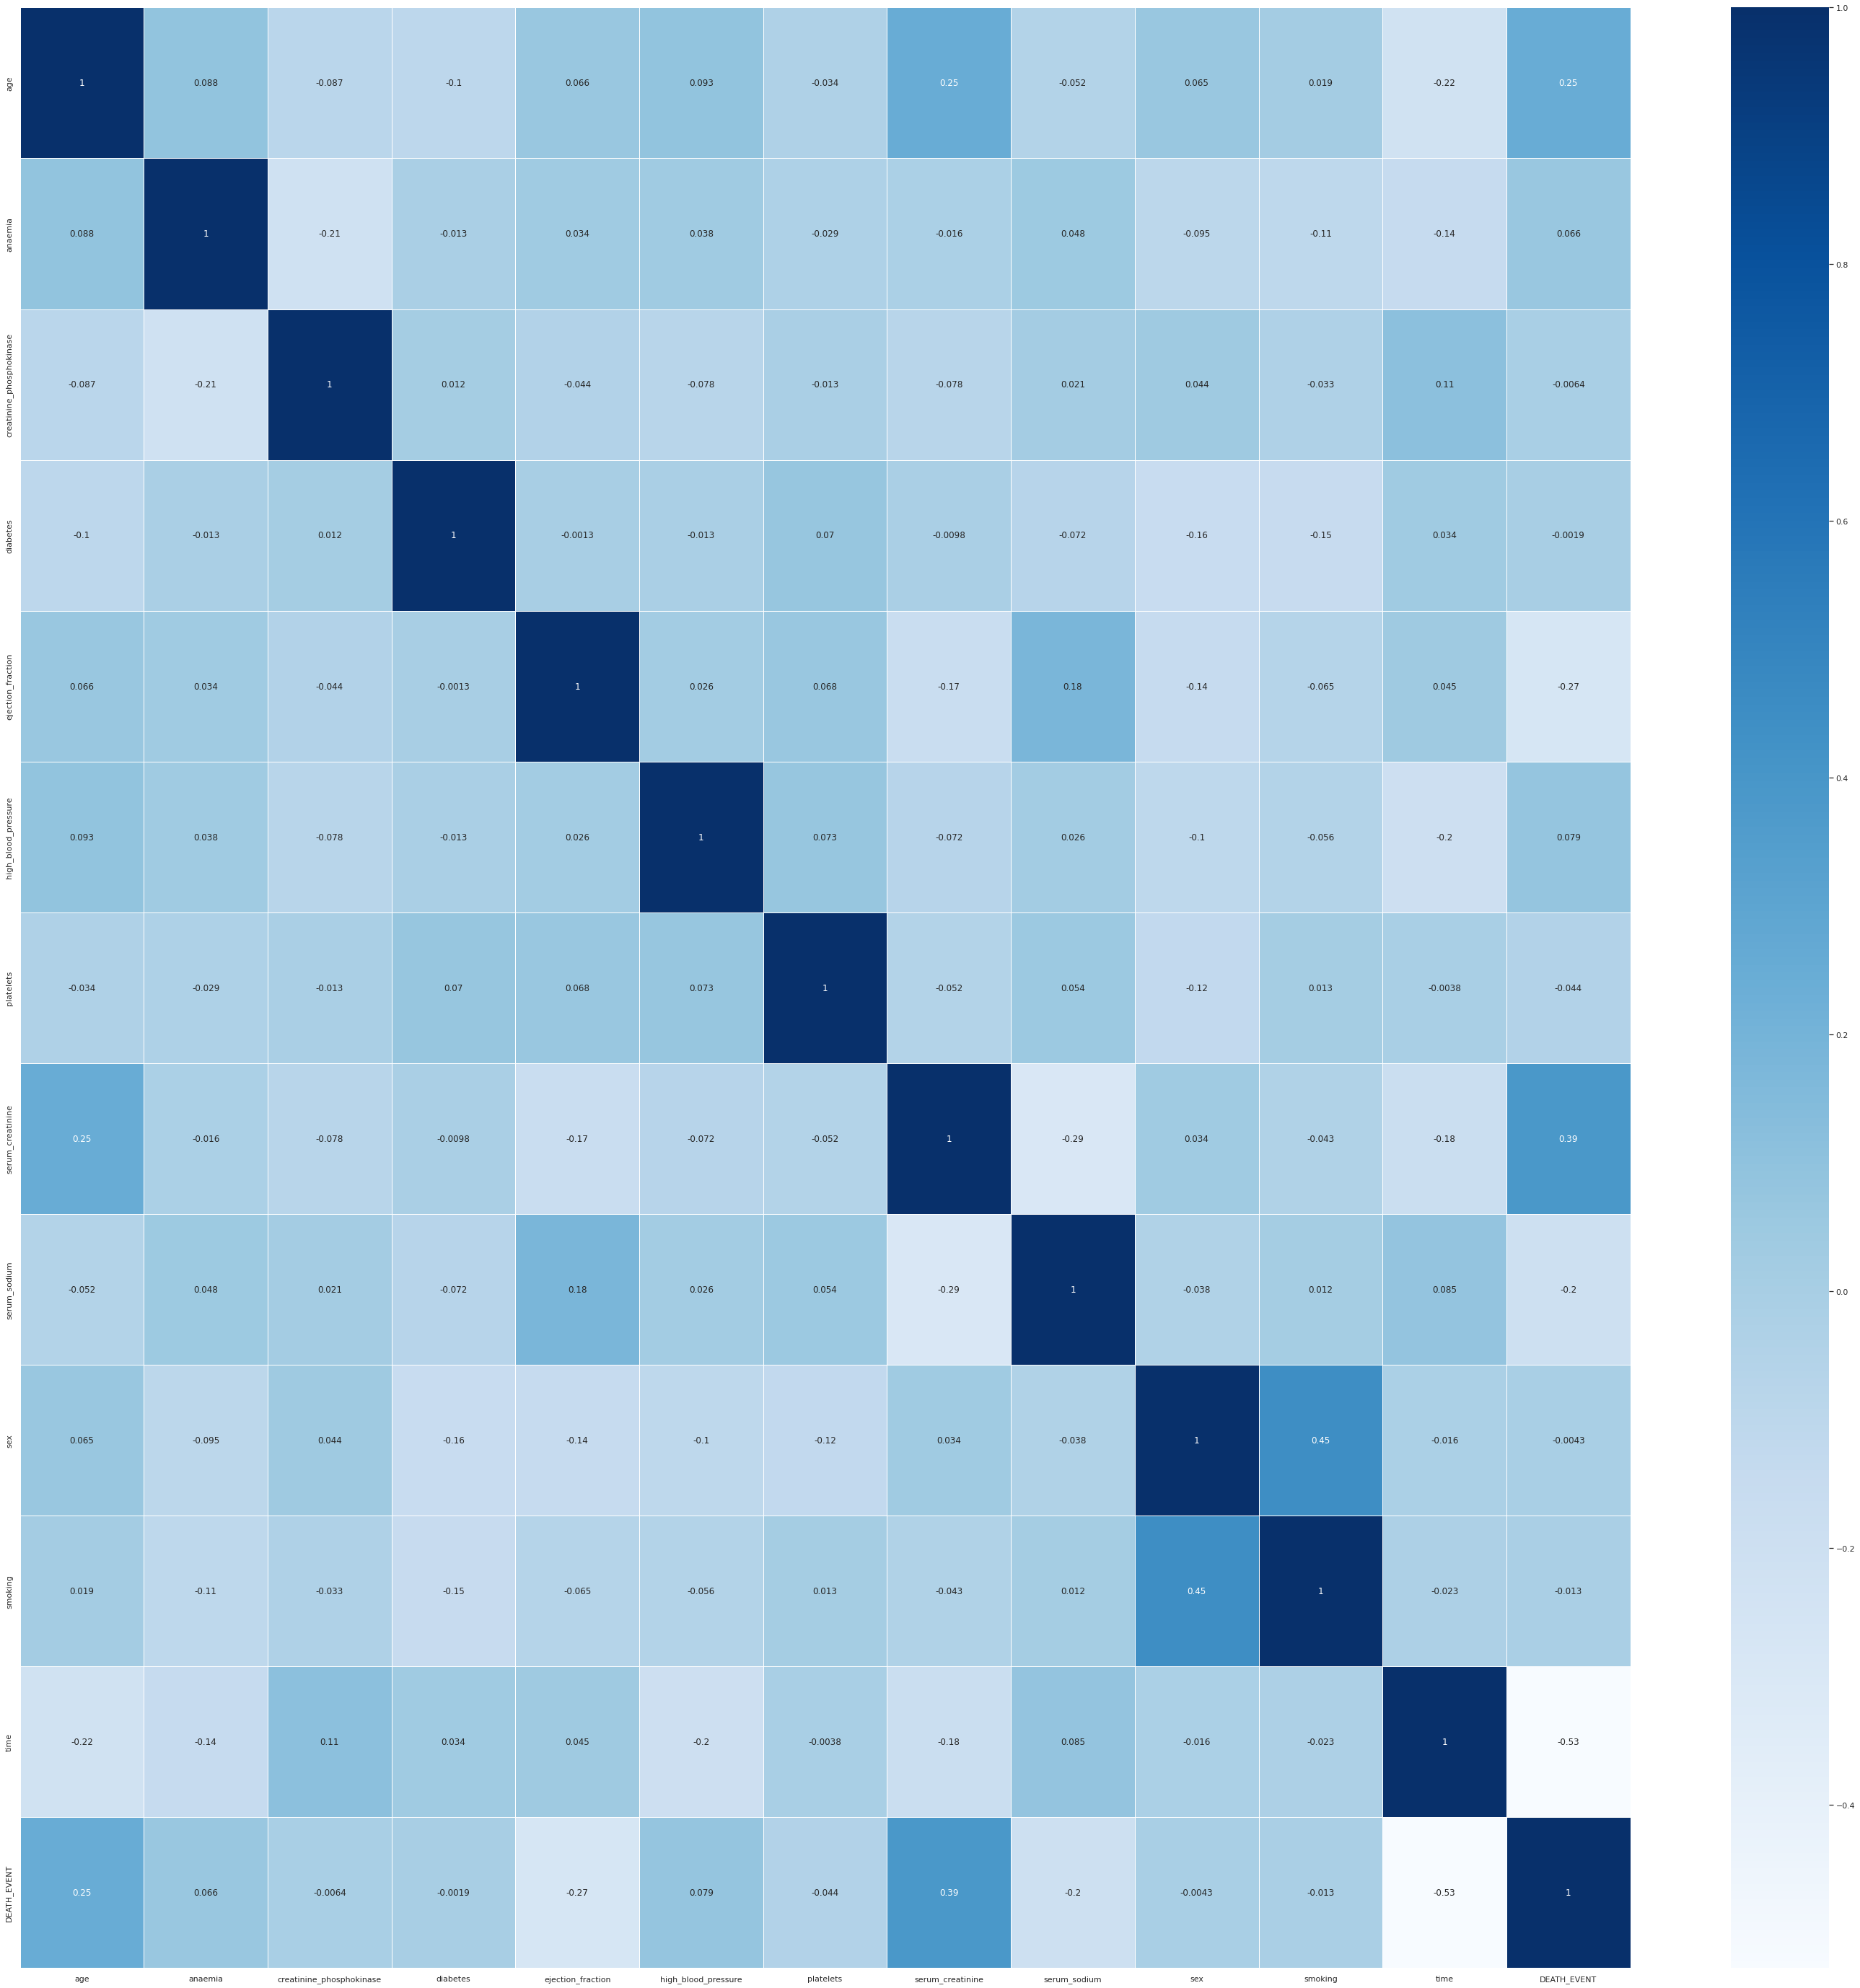

In [206]:
fig, ax = plt.subplots(figsize=(50,50))       
sns.heatmap(df3.corr(),cmap='Blues',annot=True,linewidth=0.5,ax=ax)

In [207]:
x=df3.iloc[:,:12]

In [208]:
y=df3.iloc[:,-1:]

In [209]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
rfc=RandomForestClassifier(n_estimators=100)

In [212]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [213]:
y_pred=rfc.predict(x_test)

In [214]:
from sklearn.metrics import accuracy_score

In [215]:
accuracy_score(y_test,y_pred)

0.7666666666666667

**We get around 76% accuracy for Random Forest Classifier**